In [42]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [43]:


(train_figures_X, train_y), (test_figures_X, test_y) = mnist.load_data(path='./datasets')
print('train_X shape:', train_figures_X.shape)
print('train_y shape:', train_y.shape)
print('test_X shape:', test_figures_X.shape)
print('test_y shape:', test_y.shape)
print('train_X[0]:', train_figures_X[0])
print('train_y[0]:', train_y[0])
print('test_X[0]:', test_figures_X[0])
print('test_y[0]:', test_y[0])
print('train_X[0].shape:', train_figures_X[0].shape)
print('train_y[0].shape:', train_y[0].shape)
print('test_X[0].shape:', test_figures_X[0].shape)
print('test_y[0].shape:', test_y[0].shape)
print(type(train_figures_X[0]))
print(type(train_y[0].shape))
print(type(train_figures_X))
print(type(train_y))
image=train_figures_X[0]


train_X shape: (60000, 28, 28)
train_y shape: (60000,)
test_X shape: (10000, 28, 28)
test_y shape: (10000,)
train_X[0]: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253

In [44]:


# """
# 函数说明：解析文本数据

# Parameters:
# filename - 文件名
# delim - 每一行不同特征数据之间的分隔方式，默认是tab键‘\t’

# Returns:
# j将float型数据值列表转化为矩阵返回

# """
# def loadDataSet(filename, delim='\t'):
#     fr = open(filename)
#     stringArr = [line.strip().split(delim) for line in fr.readlines()]
#     datArr = [list(map(float, line)) for line in stringArr]
#     return np.mat(datArr)


"""
函数说明：PCA特征维度压缩函数

Parameters:
dataMat - 数据集数据
topNfeat - 需要保留的特征维度，即要压缩成的维度数，默认4096

Returns:
lowDDataMat - 压缩后的数据矩阵
reconMat - 压缩后的数据矩阵反构出原始数据矩阵

"""
def pca(dataMat, topNfeat=4096):
    # 求矩阵每一列的均值
    meanVals = np.mean(dataMat, axis=0)
    # 数据矩阵每一列特征减去该列特征均值
    meanRemoved = dataMat - meanVals
    # 计算协方差矩阵，处以n-1是为了得到协方差的无偏估计
    # cov(x, 0) = cov(x)除数是n-1(n为样本个数)
    # cov(x, 1)除数是n
    covMat = np.cov(meanRemoved, rowvar=0)
    # 计算协方差矩阵的特征值及对应的特征向量
    # 均保存在相应的矩阵中
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # sort():对特征值矩阵排序(由小到大)
    # argsort():对特征矩阵进行由小到大排序，返回对应排序后的索引
    eigValInd = np.argsort(eigVals)
    # 从排序后的矩阵最后一个开始自下而上选取最大的N个特征值，返回其对应的索引
    eigValInd = eigValInd[: -(topNfeat+1): -1]
    # 将特征值最大的N个特征值对应索引的特征向量提取出来，组成压缩矩阵
    redEigVects = eigVects[:, eigValInd]
    # 将去除均值后的矩阵*压缩矩阵，转换到新的空间，使维度降低为N
    lowDDataMat = meanRemoved * redEigVects
    # 利用降维后的矩阵反构出原数据矩阵(用作测试，可跟未压缩的原矩阵比对)
    # 此处用转置和逆的结果一样redEigVects.I
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    # print(lowDDataMat)
    # print(reconMat)
    # 返回压缩后的数据矩阵及该矩阵反构出原始数据矩阵
    return lowDDataMat, reconMat


# if __name__ == '__main__':
#     dataMat = loadDataSet('数据.txt')
#     lowDmat, reconMat = pca(dataMat, 1)
#     print(np.shape(lowDmat))
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
#     ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=90, c='red')
#     plt.show()



In [45]:
feature_num=10
def getFeaturesX(images_array:np.ndarray)->np.ndarray:
    images_array=images_array.reshape(images_array.shape[0],-1)
    lowDmat, reconMat = pca(np.matrix(images_array), feature_num)
    # print("形状")
    # print(np.shape(lowDmat))
    # print(np.shape(reconMat))
    
    features_X=np.array(lowDmat)
    # features_X=np.insert(features_X,0,1.0,axis=1)
    # '''在最前面插入一列1，用于计算偏置'''
    #在使用sklearn的时候，不需要插入一列1，因为sklearn会自动添加偏置
    np.real(features_X)
    return features_X

features_X=getFeaturesX(np.append(train_figures_X,test_figures_X,axis=0))
train_features_X=features_X[0:train_figures_X.shape[0],:]
test_features_X=features_X[train_figures_X.shape[0]:,:]


print(train_features_X.dtype)
print(test_features_X.dtype)

float64
float64


In [46]:
print(train_features_X.shape)
print(test_features_X.shape)
print(train_features_X[0])  #第一行

(60000, 10)
(10000, 10)
[ 122.25525533 -316.23384391  -51.13183087 -556.89798777   49.21011911
  217.06932173  233.7133248  -188.82403179 -358.79892452 -203.5450014 ]


In [47]:
N:int=10
'''类别数为10'''
D:int=train_features_X.shape[1]
'''已经多加了一列'''

def softmax(x:np.ndarray)->np.ndarray:
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum(axis=0)

def logSoftmax(x:np.ndarray)->np.ndarray:
    tmp=x-np.max(x)
    return tmp-np.log(np.sum(np.exp(tmp)))

def multiClassLogisticRegression(phy:np.ndarray,features_X:np.ndarray)->np.ndarray:
    '''多分类逻辑回归'''
    #前者是D行N列，后者是D行I列，两者相乘得到N行I列
    return softmax(np.dot(phy.T,features_X.T))



尝试使用手动实现算法的方式进行训练，但是实践失败了。将使用现有函数的方法

In [48]:
# import winsound

# duration = 1000 # 持续时间/ms
# frequency = 500 # 频率/Hz

# def concatH(H:np.ndarray)->np.ndarray:
#     '''将Hessian矩阵拼接成一个大矩阵'''
#     H_output=np.empty(shape=(0,D*N))
#     for n in range(N):
#         H_n=np.array(H[n])
#         H_n_output=np.empty(shape=(D,0))
#         for m in range(N):
#             H_n_output=np.concatenate((H_n_output,H_n[m]),axis=1)
#         H_output=np.concatenate((H_output,H_n_output),axis=0)
#     return H_output

# def multiClassLogisticRegressionTrain(features_X:np.ndarray,y:np.ndarray,phy:np.ndarray,learning_rate:float,iteration_num:int)->np.ndarray:
#     '''多分类逻辑回归训练'''
#     I:int=features_X.shape[0]
#     '''训练样本数'''
#     g:np.ndarray=np.zeros((D,N))
#     '''梯度'''
#     H:np.ndarray=np.zeros(shape=(N,N,D,D))
#     '''Hessian矩阵'''
#     for iteration_index in range(iteration_num):
#         #实现算法9.8
#         L=0
#         '''目标函数'''

#         #for 循环内部是copilot帮忙写的，我检查了一遍，没有什么问题，非常巧妙
#         for i in range(I):
#             # print(f"---------------------------第{i}个样本—------------------------")
#             # print(f"前梯度：{g}")
#             # # print(f"前Hessian矩阵：{H}")
#             # print(f"前phy：{phy}")
#             x_i:np.ndarray=features_X[i]
#             '''第i个样本'''
#             y_i=softmax(np.dot(phy.T,x_i))
#             w_i:int=y[i]
#             '''第i个样本的类别'''
#             w_i_vector=np.zeros(N)
#             '''第i个样本的类别向量，N行1列'''
#             w_i_vector[w_i]=1
#             L=L-np.dot(w_i_vector,logSoftmax(np.dot(phy.T,x_i)))
#             # print(f"softmax前：{np.dot(phy.T,x_i)}")
#             # print(f"第{i}个样本，预测类别向量：{np.argmax(y_i)}，真实类别：{w_i}，损失：{delta_L}")
#             # print(f"logSoftmax(np.dot(phy.T,x_i))：{log_y_i}")
#             '''目标函数'''
#             #后者是1行N列，前者是D行1列，两者相乘得到D行N列
#             g=g+np.dot(x_i.reshape(D,1),((y_i-w_i_vector).reshape(1,N)))
#             '''梯度'''
#             H_n=np.zeros(shape=(N,N,D,D))
#             kernel=np.dot(x_i.reshape(D,1),x_i.reshape(1,D))
#             for n in range(N):
#                 for m in range(N):
#                     H_n[m,n]=y_i[m]*(np.eye(N)[m,n]-y_i[n])*kernel
                    
#             H=H+H_n
#             inv_H=np.linalg.inv(concatH(H))
#             reshape_g=np.reshape(g,(D*N,1),order='F')
#             phy=phy-learning_rate*np.reshape(np.dot(inv_H,reshape_g),(D,N),order='F')

#             # for n in range(N):
#             #     for m in range(N):
#             #         # print(H[m,n].shape)
#             #         # print(H[m,n])
#             #         # print(learning_rate*np.dot(np.linalg.inv(H[m,n]),g_n))
#             #         #前者是D行D列，后者是D行N列，两者相乘得到D行N列
#             #         # try:
#             #         # try:
#             #             # inv_H_m_n=np.linalg.inv(H[m,n])
#             #         # except:
#             #         inv_H_m_n=np.linalg.inv(H[m,n])
#             #         tmp=np.dot(inv_H_m_n,g)
#             #         phy=phy-learning_rate*tmp#TODO 这个地方有问题
#                     # except Exception as e:
#                     #     print(f'Exception:{e}')
#                     #     print(f'H_n[m,n]:{H_n[m,n]}')
#                     #     print(f'H[m,n]:{H[m,n]}')
#                     #     print(f'y_i:{y_i}')
#                     #     print(f'm:{m}')
#                     #     print(f'n:{n}')
#                     #     print(f'y_i[m]:{y_i[m]}')
#                     #     print(f'y_i[n]:{y_i[n]}')
#                     #     winsound.Beep(frequency, duration)
#                     #     return
#             # print(f"x_i={x_i}")
#             # print(f"y_i={y_i}")
#             # print(f"w_i={w_i}")
#             # print(f"后梯度：{g_n}")
#             # # print(f"后Hessian矩阵：{H}")
#             # print(f"后phy：{phy}")
#             # print(f"phy的形状：{phy.shape}")
#             # print(f"H[m,n].shape:{H[m,n].shape}")
#             # print(f"g_n.shape:{g_n.shape}")
#         print(f'L={L}，第{iteration_index}次迭代')
#     return phy

# phy=np.ones((D,N))
# '''特征矩阵'''
# # phy=np.random.random((D,N))
# phy=np.divide(phy,2)
# '''特征矩阵'''
# phy:np.ndarray=multiClassLogisticRegressionTrain(train_features_X,train_y,phy,1e-10,100)
# winsound.Beep(frequency, duration)


# test_y_predict:np.ndarray=multiClassLogisticRegression(phy,test_features_X)

# #统计
# test_y_hut=np.argmax(test_y_predict,axis=0)
# '''预测类别'''
# test_y_telda=test_y-test_y_hut
# '''差值'''
# test_y_difference=np.zeros(test_y_telda.shape[0])
# test_y_difference[np.nonzero(test_y_telda)]=1
# '''差值不为0的地方置1'''
# sum_difference=np.sum(test_y_difference)
# '''差值不为0的个数'''
# average_difference=sum_difference/test_y_telda.shape[0]
# '''平均差值'''
# print(f"平均差值：{average_difference}")

①多分类问题一定要设置multi_class='multinomial'。

②solver参数决定了我们对逻辑回归损失函数的优化方法，有4种算法可以选择，分别是：

a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。

b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

从上面的描述可以看出，newton-cg, lbfgs和sag这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的L1正则化，只能用于L2正则化。而liblinear通吃L1正则化和L2正则化。

同时，sag每次仅仅使用了部分样本进行梯度迭代，所以当样本量少的时候不要选择它，而如果样本量非常大，比如大于10万，sag是第一选择。但是sag不能用于L1正则化，所以当你有大量的样本，又需要L1正则化的话就要自己做取舍了。要么通过对样本采样来降低样本量，要么回到L2正则化。

另外，在使用不同的solver时，会遇到不聚合的情况，报错如下：

ConvergenceWarning: The max_iter was reached which means the coef_ did not converge warnings.warn("The max_iter was reached which means "

此时，可以增大最大迭代次数来解决，如设置max_iter=2000，默认设置为max_iter=100。

③class_weight='balanced'用于平衡数据集的类别信息。模型自动根据训练样本量计算权重，样本数目越多，权重越小，样本数越少，权重越大。

在实际应用中，如银行欺诈分类，我们往往会在意错误将欺诈的人预测为不欺诈这类错误问题，可以在实例化LogisticRegression类的时候，设置class_weight={0:0.3, 1:0.7}，0表示不欺诈，1表示欺诈，提高欺诈类的权重。

In [49]:
lr = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
#For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss
lr.fit(train_features_X,train_y) ##拟合模型

d:\CondaEnvironment\envs\Visual\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

系数

In [50]:
print("自变量系数：")
print(lr.coef_)
print("截距：")
print(lr.intercept_)

自变量系数：
[[ 6.85481937e-03 -8.11329340e-04  8.63063118e-04 -2.04857984e-03
   5.21775683e-03  1.29974263e-03 -3.19414791e-05  8.45287670e-05
  -5.58702719e-04  2.28820042e-04]
 [-7.57718215e-03 -5.46725720e-03  7.09295835e-04  9.12553633e-04
  -1.53188936e-04 -9.23253150e-04  6.18735962e-05  2.28549331e-03
  -9.92403964e-04 -4.12355248e-03]
 [ 1.20260275e-03 -4.08557945e-03  1.50589142e-03  4.67625780e-03
  -2.93533479e-03 -1.54064027e-03  1.69947034e-03 -4.93287647e-04
  -2.39826709e-03 -2.77780162e-03]
 [ 4.49751689e-04 -3.15580881e-03 -3.34685601e-03 -3.56044119e-03
  -1.44309858e-04 -1.22811252e-03  4.33782695e-04 -4.08371850e-03
   3.20917068e-04  8.81426270e-05]
 [-1.70080324e-03  7.36771959e-03  7.10410161e-04  2.27305520e-03
  -3.41127368e-03  1.57465149e-03 -4.67456492e-03 -6.92791009e-04
   5.29640304e-04  4.02967014e-03]
 [ 2.60448948e-03 -1.65266986e-03 -8.48276612e-04 -3.47233604e-03
   3.01093732e-03  2.02906512e-03 -1.81793422e-03  1.53926021e-03
   1.01590423e-03  5.24716

模型得分

float64
float64
决定系数-------------------------------------------
训练集：0.8012333333333334，测试集：0.8087
准确率-------------------------------------------
训练集：0.8012333333333334，测试集：0.8087
召回率-------------------------------------------
训练集：0.7980357651090854，测试集：0.805618029573281
精确率-------------------------------------------
训练集：0.7980866664038718，测试集：0.8058742451683036
F1值-------------------------------------------
训练集：0.7978317925689831，测试集：0.8055275751352731
交叉验证-------------------------------------------


d:\CondaEnvironment\envs\Visual\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\CondaEnvironment\envs\Visual\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

训练集：[0.806      0.79725    0.79533333 0.79375    0.81475   ]，测试集：[0.7655 0.764  0.8095 0.8245 0.8355]
混淆矩阵-------------------------------------------


d:\CondaEnvironment\envs\Visual\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


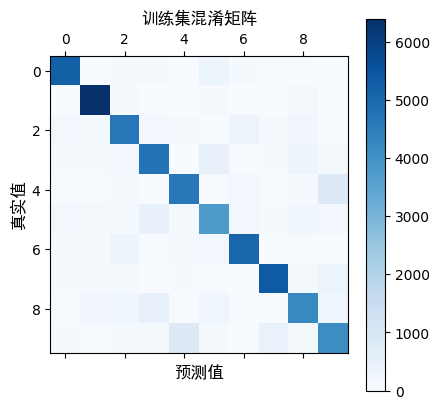

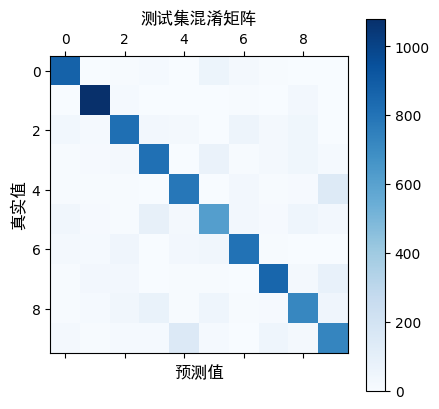

AUC值-------------------------------------------
训练集：0.9953797836447839，测试集：0.9969096903876303


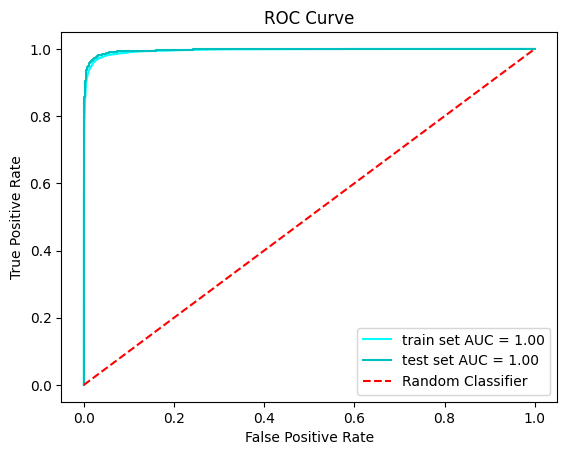

In [53]:
font_set=FontProperties(fname=r"c:/windows/fonts/simhei.ttf", size=12)

print(train_features_X.dtype)
print(test_features_X.dtype)

print("决定系数-------------------------------------------")
train_R2_score=lr.score(train_features_X,train_y)
test_R2_score=lr.score(test_features_X,test_y)
print(f"训练集：{train_R2_score}，测试集：{test_R2_score}")

print("准确率-------------------------------------------")
train_accuracy_score=accuracy_score(train_y,lr.predict(train_features_X))
test_accuracy_score=accuracy_score(test_y,lr.predict(test_features_X))
print(f"训练集：{train_accuracy_score}，测试集：{test_accuracy_score}")

print("召回率-------------------------------------------")
train_recall_score=recall_score(train_y,lr.predict(train_features_X),average='macro')
test_recall_score=recall_score(test_y,lr.predict(test_features_X),average='macro')
print(f"训练集：{train_recall_score}，测试集：{test_recall_score}")

print("精确率-------------------------------------------")
train_precision_score=precision_score(train_y,lr.predict(train_features_X),average='macro')
test_precision_score=precision_score(test_y,lr.predict(test_features_X),average='macro')
print(f"训练集：{train_precision_score}，测试集：{test_precision_score}")

print("F1值-------------------------------------------")
train_f1_score=f1_score(train_y,lr.predict(train_features_X),average='macro')
test_f1_score=f1_score(test_y,lr.predict(test_features_X),average='macro')
print(f"训练集：{train_f1_score}，测试集：{test_f1_score}")

print("交叉验证-------------------------------------------")
train_cross_val_score=cross_val_score(lr,train_features_X,train_y,cv=5,scoring='accuracy')
test_cross_val_score=cross_val_score(lr,test_features_X,test_y,cv=5,scoring='accuracy')
print(f"训练集：{train_cross_val_score}，测试集：{test_cross_val_score}")

print("混淆矩阵-------------------------------------------")
train_confusion_matrix=confusion_matrix(train_y,lr.predict(train_features_X))
test_confusion_matrix=confusion_matrix(test_y,lr.predict(test_features_X))

plt.matshow(train_confusion_matrix,cmap=plt.cm.Blues)
plt.colorbar()
plt.title('训练集混淆矩阵',fontproperties=font_set)
plt.ylabel('真实值',fontproperties=font_set)
plt.xlabel('预测值',fontproperties=font_set)
plt.show()

plt.matshow(test_confusion_matrix,cmap=plt.cm.Blues)
plt.colorbar()
plt.title('测试集混淆矩阵',fontproperties=font_set)
plt.ylabel('真实值',fontproperties=font_set)
plt.xlabel('预测值',fontproperties=font_set)
plt.show()


print("AUC值-------------------------------------------")
train_fpr, train_tpr, train_thresholds = roc_curve(train_y, lr.predict_proba(train_features_X)[:,1], pos_label=1)
train_roc_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(test_y, lr.predict_proba(test_features_X)[:,1], pos_label=1)
test_roc_auc = auc(test_fpr, test_tpr)
print(f"训练集：{train_roc_auc}，测试集：{test_roc_auc}")

plt.plot(train_fpr, train_tpr,color='cyan', label=f'train set AUC = {train_roc_auc:.2f}')  # 绘制ROC曲线，标注AUC的值
plt.plot(test_fpr, test_tpr,color='c', label=f'test set AUC = {test_roc_auc:.2f}')  # 绘制ROC曲线，标注AUC的值
# 随即分类器没有分类能力，其FPR=TPR。随机分类器的性能通常表示为ROC曲线上的对角线
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  # 绘制随机分类器的ROC曲线
plt.xlabel('False Positive Rate')  # x轴标签为FPR
plt.ylabel('True Positive Rate')   # y轴标签为TPR
plt.title('ROC Curve')             # 设置标题
plt.legend()                    
plt.show()